In [7]:
#Importing Libraries
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns


#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning Data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DA_Ind = df[((df['job_title'] == 'Data Analyst')&(df['job_country'] == 'India'))]

In [3]:
df_DA_Ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
504,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via Shine,Full-time,False,India,2023-11-12 13:08:06,True,False,India,None,NaN,NaN,HSBC,"[sql, nosql, python, r, mysql, sql server, pos...","{'analyst_tools': ['qlik', 'tableau', 'power b..."
691,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-09-12 13:14:38,True,False,India,None,NaN,NaN,AOS,None,None
1399,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-07-04 13:13:00,True,False,India,None,NaN,NaN,Infosys BPM,"[sql, shell, r, bigquery, pandas, linux, excel...","{'analyst_tools': ['excel', 'tableau', 'qlik']..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784845,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-25 06:14:59,True,False,India,None,NaN,NaN,Capgemini,"[sql, visio]","{'analyst_tools': ['visio'], 'programming': ['..."
785157,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-01-31 06:11:12,False,False,India,None,NaN,NaN,ARYAN TECHNOLOGY,"[sql, javascript, sas, sas, excel, spss]","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."
785515,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-09-01 06:17:34,False,False,India,year,105000.0,NaN,Myntra,None,None
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."


In [4]:
df_DA_Ind['job_location'].value_counts().head(10)

job_location
India                          531
Hyderabad, Telangana, India    303
Anywhere                       202
Bengaluru, Karnataka, India    100
Maharashtra, India              65
Mumbai, Maharashtra, India      48
Pune, Maharashtra, India        38
Gurugram, Haryana, India        34
Chennai, Tamil Nadu, India      32
New Delhi, Delhi, India         22
Name: count, dtype: int64

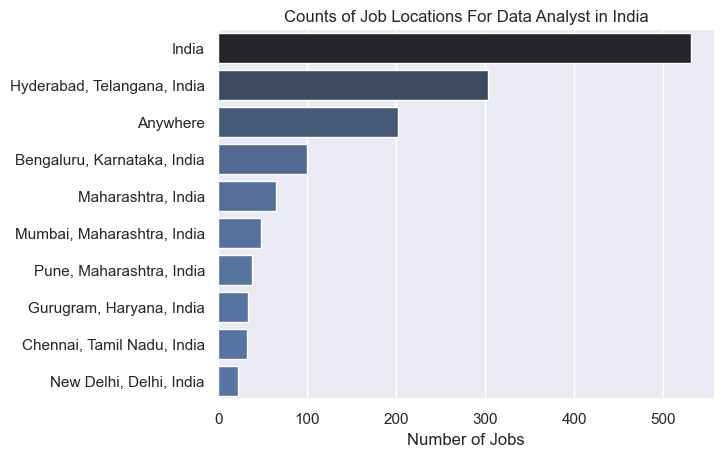

In [13]:
sns.set_theme()
df_plot = df_DA_Ind['job_location'].value_counts().head(10).to_frame()

sns.barplot(x='count', y='job_location', data=df_plot ,legend =False, hue= 'count' , palette='dark:b_r')
sns.despine()
plt.title('Counts of Job Locations For Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

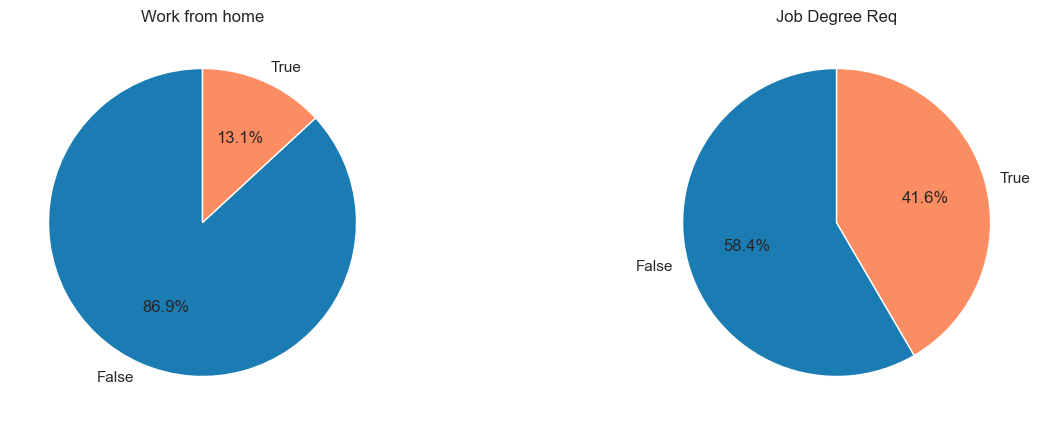

In [23]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

dict_column = {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Job Degree Req'
}

for  i, (column,title) in enumerate(dict_column.items()):
    
    ax[i].pie(df_DA_Ind[column].value_counts(), startangle=90, autopct='%1.1f%%', labels = ['False','True'], colors=["#1b7cb4", '#fc8d62'])
    ax[i].set_title(title)
    ax[i].set_ylabel('')    

plt.show()

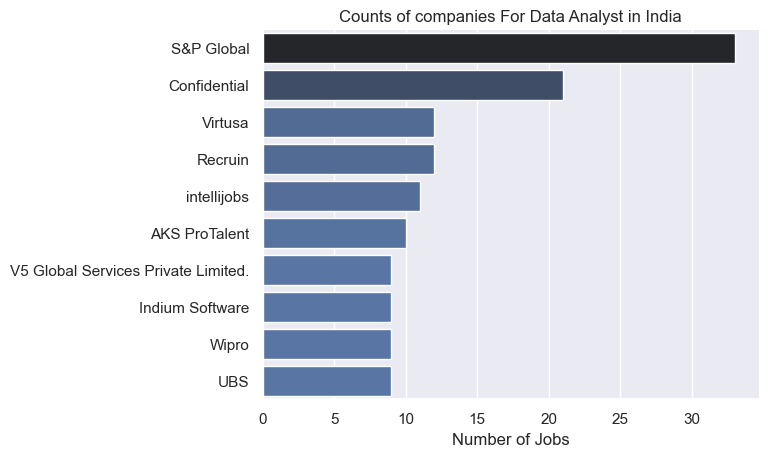

In [25]:
sns.set_theme()
df_plot = df_DA_Ind['company_name'].value_counts().head(10).to_frame()

sns.barplot(x='count', y='company_name', data=df_plot ,legend =False, hue= 'count' , palette='dark:b_r')
sns.despine()
plt.title('Counts of companies For Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()